## Exploratory data analysis and feature extraction with Python on Titanic dataset

#### Objective : To perform Exploratory Data Analysis on Titanic Dataset to predict the survival status of a passanger.

Contents:
       1. Loading the data
       2. Describe the data
       3. Feature Extraction (Countplot, Histograms , PDF & CDF)
             1. Feature 1: Survived
             2. Feture 2 : Sex
             3. Feature 3: Pclass
             4. Feature 4: Age
             5. Feature 5: Parch
             6. Feature 6: Fare
             7. Feature 7 :Embarked
       4.Graphical Bi-variate Analysis  
       5. Mean,Median,  Percentile, Quantile, IQR, MAD and Std-dev(Only three features)
             5.1. Age
                 5.1.1.Box plot and Whiskers 
                 5.1.2.Violin plot 
             5.2. Fare
                 5.2.1.Box plot and Whiskers 
                 5.2.2.Violin plot
             5.3  Pclass
                 5.3.1.Box plot and Whiskers  
                 5.3.2.Violin plot
       6. Correlation Matrix


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore") 

## 1. Loading the data

In [2]:
#https://www.kaggle.com/c/titanic/data
titanic_data = pd.read_csv("train.csv")
#titanic_data = titanic_data.dropna()
titanic_data.head(10)         #head gives the view of the tops rows of data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
titanic_data.shape          # shape of the data

(891, 12)

## 2. describe the data

In [4]:
titanic_data.info()    # information about the daaset's all columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
titanic_data.describe()        # describe count, mean, stadndard deviation, min max and 25 ,50, 75 percentile

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
#https://machinelearningmastery.com/handle-missing-data-python/
# Created table for missing data value analysis

def missing_data_values_table(df):      # takes dataframe as input 
    total = df.isnull().sum().sort_values(ascending=False)          # checks for null value 
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)  #calculate the percentages of null val count
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent']) # concate the total null value with percentage
    return missing_data

#shows missing values in tabular format
missing_data_values_table(titanic_data)

,Total,Percent
Cabin,687,0.771044
Age,177,0.198653
Embarked,2,0.002245
Fare,0,0.000000
Ticket,0,0.000000
Parch,0,0.000000
SibSp,0,0.000000
Sex,0,0.000000
Name,0,0.000000
Pclass,0,0.000000


In [7]:
#Que : What are the column names in the dataset?
print(titanic_data.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


## Feature Extraction

### Feature 1: Survived

In [8]:
#Que: How many data points for survived class are present?
titanic_data['Survived'].value_counts() 

0    549
1    342
Name: Survived, dtype: int64

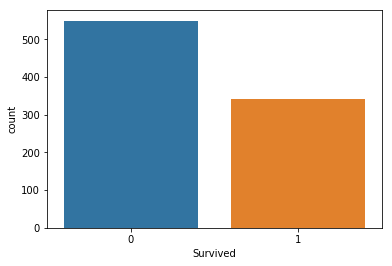

In [9]:
#grahical representation
sns.countplot(x='Survived', data=titanic_data);

### survived value couns shows an balanced dataset because there are only two status :
       0 : passanger not survived
       1 : passanger survived

## Feature 2 : Sex

In [10]:
# from survived how many were maile and female
titanic_data.groupby(['Survived','Sex'])['Survived'].count()

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: Survived, dtype: int64

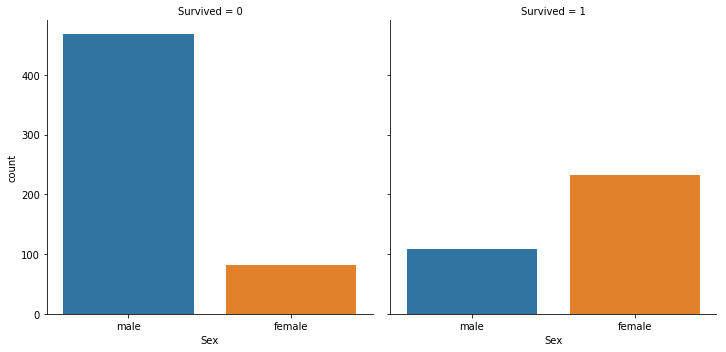

In [11]:
#grahical representation
sns.catplot(x='Sex', col='Survived', kind='count', data=titanic_data)

### Observation : above graphs shows the number of male and female surived and no survived.
    No.of male not survived : 486
    No. of female not survived : 81
    No. of male survived : 109
    No. of female survived :233
### The numbers indicate that the percentage of male survived is less than the percentage of female survived.
  
  
  

## Feature 3: Pclass

In [12]:
pd.crosstab([titanic_data.Sex, titanic_data.Survived], titanic_data.Pclass, margins=True)

Pclass             1    2    3  All
Sex    Survived                    
female 0           3    6   72   81
       1          91   70   72  233
male   0          77   91  300  468
       1          45   17   47  109
All              216  184  491  891

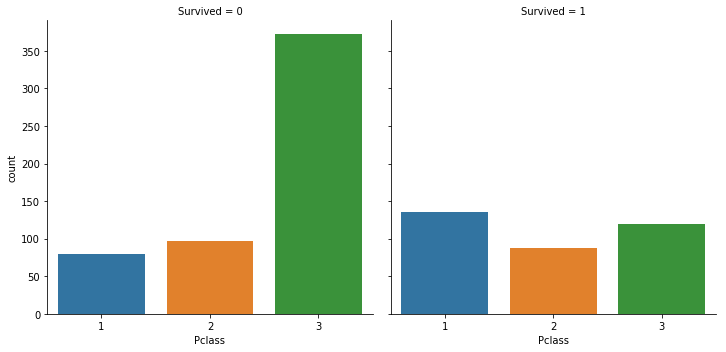

In [13]:
sns.catplot(x='Pclass', col='Survived', kind='count', data=titanic_data)

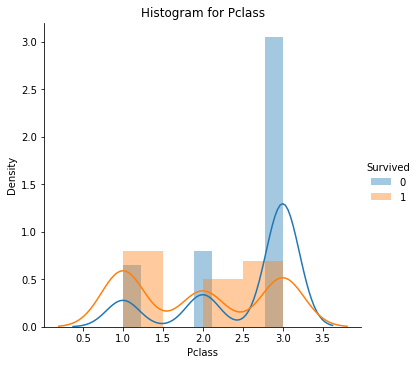

In [14]:
# Histogram for Pclass
sns.FacetGrid(titanic_data, hue="Survived", height=5).map(sns.distplot, "Pclass").add_legend();
plt.xlabel("Pclass")
plt.ylabel("Density")
plt.title("Histogram for Pclass")
plt.show()

[0.86178862 0.         0.09756098 0.         0.04065041]
[1.  1.4 1.8 2.2 2.6 3. ]
[0.86666667 0.         0.         0.         0.         0.05
 0.         0.         0.         0.08333333]
[1.  1.2 1.4 1.6 1.8 2.  2.2 2.4 2.6 2.8 3. ]


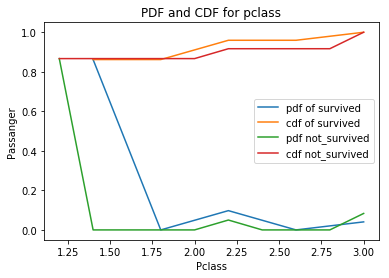

In [15]:
# Plots of CDF of age for status.
titanic_data  = titanic_data.dropna()
survived = titanic_data.loc[titanic_data["Survived"] == 1]
not_survived = titanic_data.loc[titanic_data["Survived"] == 0]

label = ["pdf of survived","cdf of survived", "pdf not_survived","cdf not_survived" ]
#survival 
counts, bin_edges = np.histogram(survived['Pclass'], bins=5, density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


# no survival
counts, bin_edges = np.histogram(not_survived['Pclass'], bins=10, density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.legend(label)
plt.xlabel("Pclass")
plt.ylabel("Passanger")
plt.title("PDF and CDF for pclass")
plt.show()

### Observation :
    From all the above graphs , I observed that the passangers who were travelling in 3rd class , mostly of them could not survived than the other class passangers. The Passangers who were travelling in 2nd class, out of them almost equal number  of people died and survived. Large number of Passangers in 1st class is survived and also fair number of people died. It means the passanger in lower class had more chances to die than passangers in upper class.

## Feature 4:  Age

In [16]:
titanic_data  = titanic_data.fillna(28) #fillinf null value with median value

In [17]:
# Divide Fare into 5 bins 
titanic_data['Age_new'] = pd.qcut(titanic_data['Age'], 5) 

In [18]:
titanic_data.groupby(['Survived','Age_new'])['Survived'].count()

Survived  Age_new      
0         (0.919, 23.0]     7
          (23.0, 31.0]     11
          (31.0, 39.0]      9
          (39.0, 49.0]     14
          (49.0, 80.0]     19
1         (0.919, 23.0]    32
          (23.0, 31.0]     24
          (31.0, 39.0]     31
          (39.0, 49.0]     19
          (49.0, 80.0]     17
Name: Survived, dtype: int64

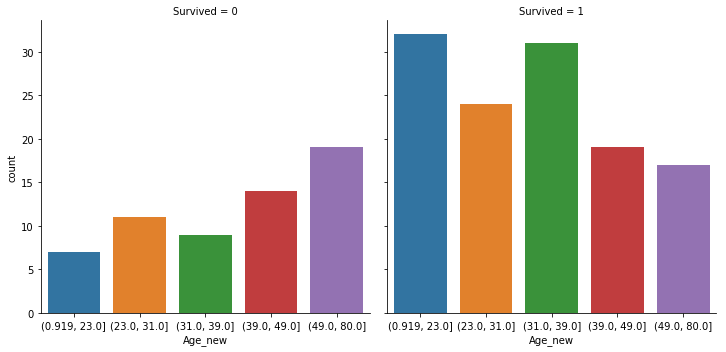

In [19]:
sns.catplot(x='Age_new', col='Survived', kind='count', data=titanic_data)

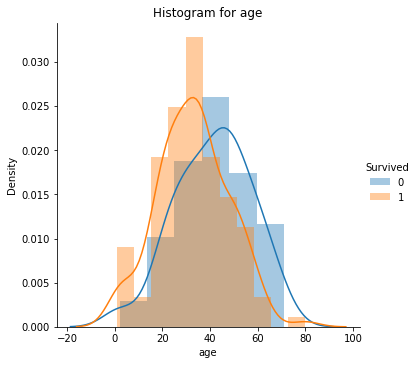

In [20]:
# Histogram for age
sns.FacetGrid(titanic_data, hue="Survived", height=5).map(sns.distplot, "Age").add_legend();
plt.xlabel("age")
plt.ylabel("Density")
plt.title("Histogram for age")
plt.show()

[0.11382114 0.37398374 0.34146341 0.16260163 0.00813008]
[ 0.92  16.736 32.552 48.368 64.184 80.   ]
[0.03333333 0.         0.08333333 0.13333333 0.11666667 0.11666667
 0.25       0.1        0.1        0.06666667]
[ 2.   8.9 15.8 22.7 29.6 36.5 43.4 50.3 57.2 64.1 71. ]


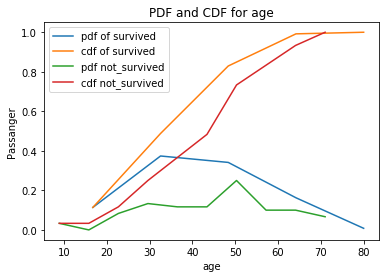

In [21]:
# Plots of CDF of age for status.

survived = titanic_data.loc[titanic_data["Survived"] == 1]
not_survived = titanic_data.loc[titanic_data["Survived"] == 0]

label = ["pdf of survived","cdf of survived", "pdf not_survived","cdf not_survived" ]
#survival 
counts, bin_edges = np.histogram(survived['Age'], bins=5, density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


# no survival
counts, bin_edges = np.histogram(not_survived['Age'], bins=10, density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.legend(label)
plt.xlabel("age")
plt.ylabel("Passanger")
plt.title("PDF and CDF for age")
plt.show()

Observation :
    Age feature consist some null value so i filled them with median of age feaure. All the above graphs specially pdfs are almost overlapping of each other. Passanger between age 20 to 40 have higher rate of survival than remaining group ages.

## Feature 5 : Parch 

In [22]:
#parch - Number of Parents/Children Aboard
titanic_data.groupby(['Survived','Parch'])['Survived'].count()

Survived  Parch
0         0        42
          1        11
          2         6
          4         1
1         0        80
          1        26
          2        17
Name: Survived, dtype: int64

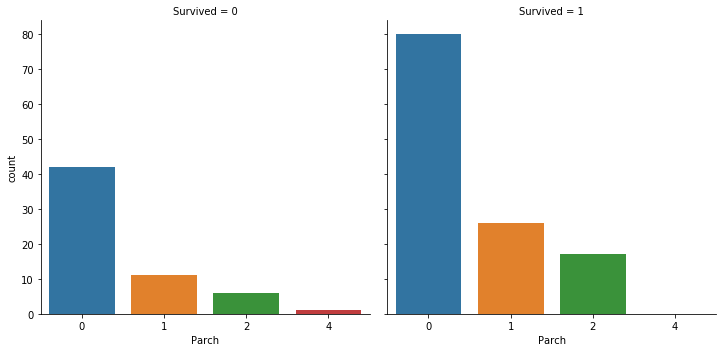

In [23]:
sns.catplot(x='Parch', col='Survived', kind='count', data=titanic_data)

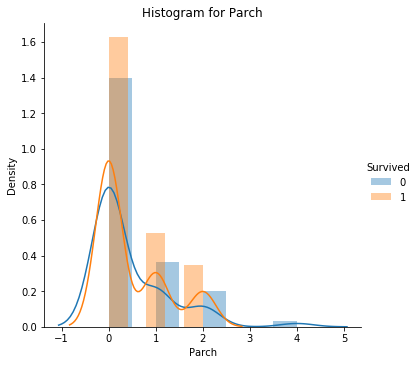

In [24]:
# Histogram for Parch
sns.FacetGrid(titanic_data, hue="Survived", height=5).map(sns.distplot, "Parch").add_legend();
plt.xlabel("Parch")
plt.ylabel("Density")
plt.title("Histogram for Parch")
plt.show()

[0.6504065  0.         0.21138211 0.         0.13821138]
[0.  0.4 0.8 1.2 1.6 2. ]
[0.7        0.         0.18333333 0.         0.         0.1
 0.         0.         0.         0.01666667]
[0.  0.4 0.8 1.2 1.6 2.  2.4 2.8 3.2 3.6 4. ]


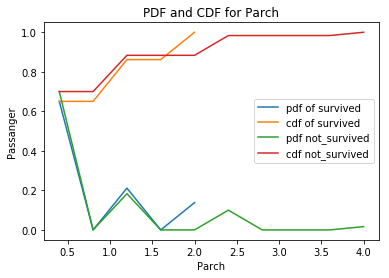

In [26]:
# Plots of CDF of Parch.

survived = titanic_data.loc[titanic_data["Survived"] == 1]
not_survived = titanic_data.loc[titanic_data["Survived"] == 0]

label = ["pdf of survived","cdf of survived", "pdf not_survived","cdf not_survived" ]
#survival 
counts, bin_edges = np.histogram(survived['Parch'], bins=5, density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


# no survival
counts, bin_edges = np.histogram(not_survived['Parch'], bins=10, density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.legend(label)
plt.xlabel("Parch")
plt.ylabel("Passanger")
plt.title("PDF and CDF for Parch")
plt.show()

Observation :
    From the graphs of Parch I observed that, whose passangers have parent/children aboard have higher rate of survival.

## Feature 6: Fare

In [28]:
# Divide Fare into 4 bins 
titanic_data['Fare_new'] = pd.qcut(titanic_data['Fare'], 4) 

In [29]:
titanic_data.groupby(['Survived','Fare_new'])['Survived'].count()

Survived  Fare_new       
0         (-0.001, 29.7]     20
          (29.7, 57.0]       17
          (57.0, 90.0]       12
          (90.0, 512.329]    11
1         (-0.001, 29.7]     27
          (29.7, 57.0]       29
          (57.0, 90.0]       33
          (90.0, 512.329]    34
Name: Survived, dtype: int64

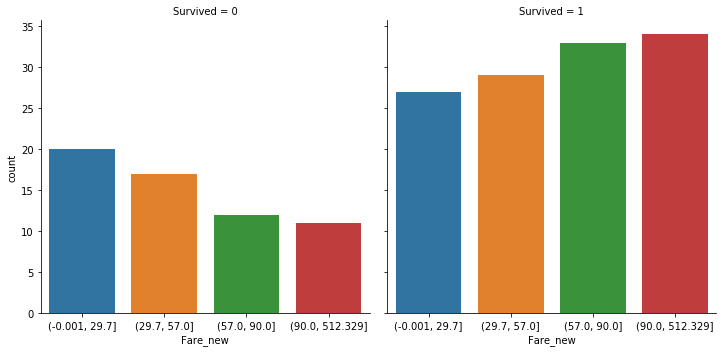

In [30]:
sns.catplot(x='Fare_new', col='Survived', kind='count', data=titanic_data)

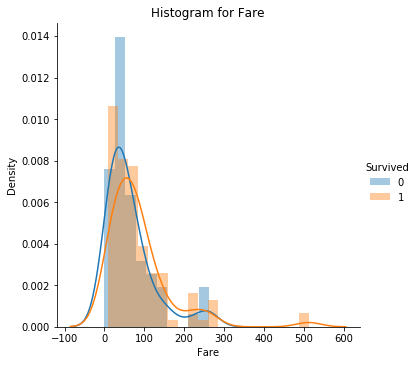

In [31]:
# Histogram for fare
sns.FacetGrid(titanic_data, hue="Survived", height=5).map(sns.distplot, "Fare").add_legend();
plt.xlabel("Fare")
plt.ylabel("Density")
plt.title("Histogram for Fare")
plt.show()

[0.76422764 0.13821138 0.08130081 0.         0.01626016]
[  8.05    108.90584 209.76168 310.61752 411.47336 512.3292 ]
[0.2        0.36666667 0.16666667 0.08333333 0.06666667 0.05
 0.         0.         0.01666667 0.05      ]
[  0.   26.3  52.6  78.9 105.2 131.5 157.8 184.1 210.4 236.7 263. ]


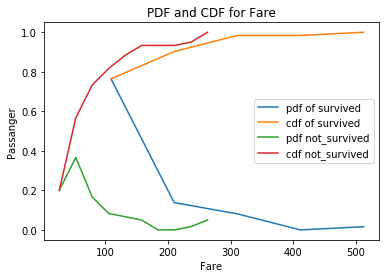

In [32]:
# Plots of CDF of Fare.

survived = titanic_data.loc[titanic_data["Survived"] == 1]
not_survived = titanic_data.loc[titanic_data["Survived"] == 0]

label = ["pdf of survived","cdf of survived", "pdf not_survived","cdf not_survived" ]
#survival 
counts, bin_edges = np.histogram(survived['Fare'], bins=5, density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


# no survival
counts, bin_edges = np.histogram(not_survived['Fare'], bins=10, density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.legend(label)
plt.xlabel("Fare")
plt.ylabel("Passanger")
plt.title("PDF and CDF for Fare")
plt.show()

### Observation :
    From graph of Fare I observed that the Passangers less amount of Fare had higer chance not to survived. On the other 
    hand Passengers who paid high high amount of Fare have a higher chamce o survive. This Feature is somewhat similar to  Pclass Feature.

In [33]:
## Feature 7: Embarked

In [34]:
titanic_data.groupby(['Survived','Embarked'])['Survived'].count()

Survived  Embarked
0         C           17
          Q            1
          S           42
1         C           48
          Q            1
          S           74
Name: Survived, dtype: int64

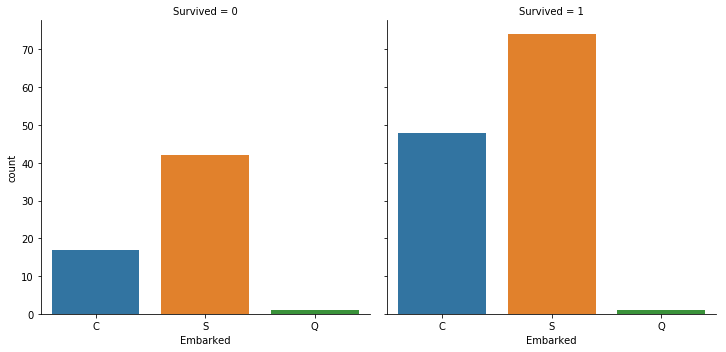

In [35]:
sns.catplot(x='Embarked', col='Survived', kind='count', data=titanic_data)

## 4. Graphical Bi-variate Analysis

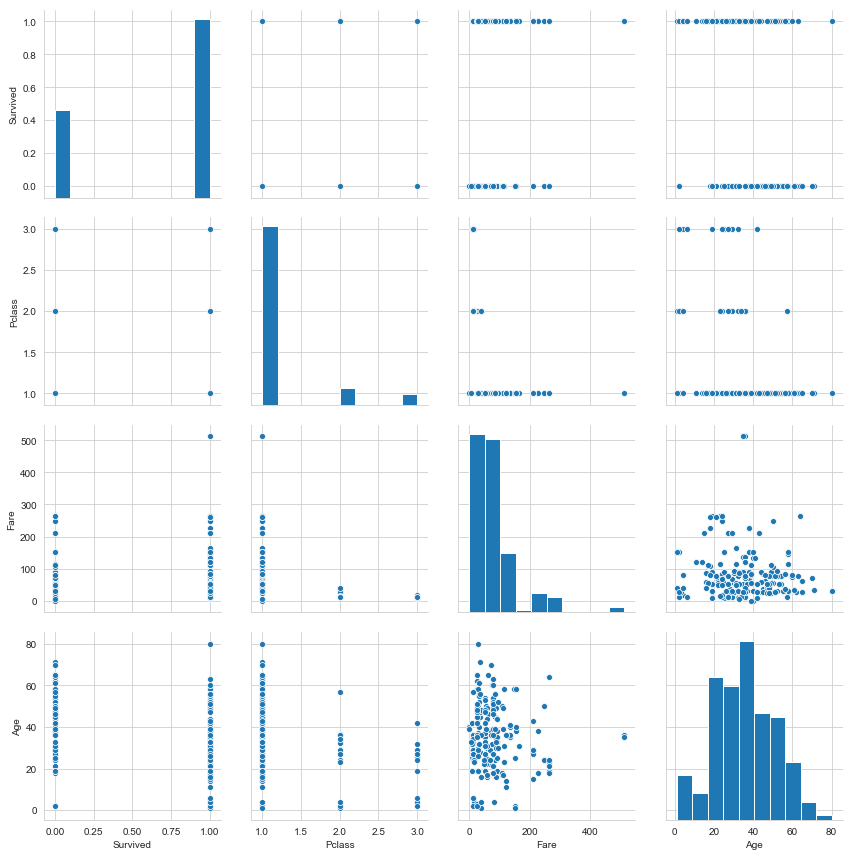

In [45]:
# Pair plot, we can look at the interaction of features with each other
# here we take only 4 features to  perform analysis.
sns.set_style("whitegrid");
sns.pairplot(titanic_data[["Survived","Pclass","Fare","Age"]],size=3);
plt.show()

### Observation :
  In the pair plots above , Like observed in above feature graphs , passengers who paid higher amount of fare or travelling in upper class has a higher chances to survive than the passangers in lower classes. Age Feature is also whowing like younger age perople have more chance to survive. Only age versus fare is much overlappingso cant conclude anything from that.

## 5. Mean,Median,  Percentile, Quantile, IQR, MAD and Std-dev

### 5.1 Age

In [46]:
print("\n Means for titanic database for Age  :")
print(np.mean(survived["Age"]))
print(np.mean(not_survived["Age"]))

print("\n Medians for titanic database for Age :")
print(np.median(survived["Age"]))
print(np.median(not_survived["Age"]))

print("\nStd-deviation for titanic database for age :");
print(np.std(survived["Age"]))
print(np.std(not_survived["Age"]))

print("\n Quantiles for titanic database for Age :")
print(np.percentile(survived["Age"],np.arange(0, 100, 25)))
print(np.percentile(not_survived["Age"],np.arange(0, 100, 25)))


print("\n90th Percentiles for titanic database for Age :")
print(np.percentile(survived["Age"],90))
print(np.percentile(not_survived["Age"],90))

from statsmodels import robust
print ("\n Median Absolute Deviation for titanic database for Age ")
print(robust.mad(survived["Age"]))
print(robust.mad(not_survived["Age"]))



 Means for titanic database for Age  :
32.905853658536586
41.35

 Medians for titanic database for Age :
33.0
44.5

Std-deviation for titanic database for age :
14.829460402050456
15.607770500619234

 Quantiles for titanic database for Age :
[ 0.92 23.   33.   42.  ]
[ 2.   29.75 44.5  52.5 ]

90th Percentiles for titanic database for Age :
52.0
61.1

 Median Absolute Deviation for titanic database for Age 
14.82602218505602
17.049925512814422


### 5.1.1.Box plot and Whiskers for "Age"

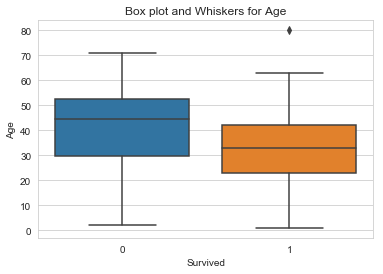

In [47]:
sns.boxplot(x='Survived',y='Age', data=titanic_data).set_title('Box plot and Whiskers for Age')
plt.show()

### 5.1.2 Violin PLot

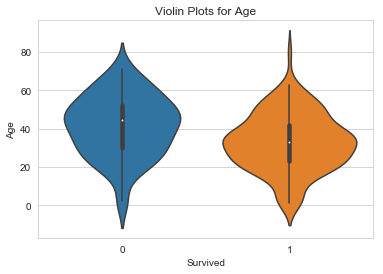

In [48]:
#Violin plot
sns.violinplot(x="Survived", y="Age", data=titanic_data, height=8).set_title("Violin Plots for Age")
plt.show()

### 5.2 Fare

In [49]:
print("\n Means for titanic database for Fare :")
print(np.mean(survived["Fare"]))
print(np.mean(not_survived["Fare"]))

print("\n Medians for titanic database for Fare:")
print(np.median(survived["Fare"]))
print(np.median(not_survived["Fare"]))

print("\nStd-deviation for titanic database for Fare :");
print(np.std(survived["Fare"]))
print(np.std(not_survived["Fare"]))

print("\n Quantiles for titanic database for Fare:")
print(np.percentile(survived["Fare"],np.arange(0, 100, 25)))
print(np.percentile(not_survived["Fare"],np.arange(0, 100, 25)))

print("\n90th Percentiles for titanic database for Fare:")
print(np.percentile(survived["Fare"],90))
print(np.percentile(not_survived["Fare"],90))

from statsmodels import robust
print ("\n Median Absolute Deviation for titanic database for Fare")
print(robust.mad(survived["Fare"]))
print(robust.mad(not_survived["Fare"]))


 Means for titanic database for Fare :
85.82110650406503
64.04826166666668

 Medians for titanic database for Fare:
69.3
45.3104

Std-deviation for titanic database for Fare :
81.51014536671822
61.17718461036788

 Quantiles for titanic database for Fare:
[ 8.05 30.5  69.3  93.5 ]
[ 0.     27.45   45.3104 79.2   ]

90th Percentiles for titanic database for Fare:
162.58585999999997
151.55

 Median Absolute Deviation for titanic database for Fare
57.52496607801735
34.82573307180918


### 5.2.1.Box plot and Whiskers for fare 

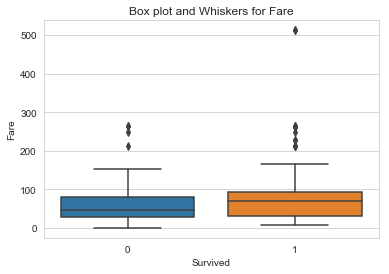

In [50]:
sns.boxplot(x='Survived',y='Fare', data=titanic_data).set_title('Box plot and Whiskers for Fare')
plt.show()

### 5.2.2. Viloin plot

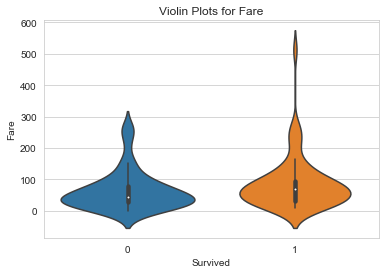

In [127]:
#Violin plot
sns.violinplot(x="Survived", y="Fare", data=titanic_data, height=8).set_title("Violin Plots for Fare")
plt.show()

## 5.3 Pclass 

In [51]:
print("\n Means for titanic database for Pclass  :")
print(np.mean(survived["Pclass"]))
print(np.mean(not_survived["Pclass"]))

print("\n Medians for titanic database for Pclass:")
print(np.median(survived["Pclass"]))
print(np.median(not_survived["Pclass"]))


print("\nStd-deviation for titanic database for Pclass :");
print(np.std(survived["Pclass"]))
print(np.std(not_survived["Pclass"]))

print("\n Quantiles for titanic database for Pclass:")
print(np.percentile(survived["Pclass"],np.arange(0, 100, 25)))
print(np.percentile(not_survived["Pclass"],np.arange(0, 100, 25)))

print("\n90th Percentiles for titanic database for Pclass:")
print(np.percentile(survived["Pclass"],90))
print(np.percentile(not_survived["Pclass"],90))

from statsmodels import robust
print ("\n Median Absolute Deviation for titanic database for Pclass")
print(robust.mad(survived["Pclass"]))
print(robust.mad(not_survived["Pclass"]))


 Means for titanic database for Pclass  :
1.1788617886178863
1.2166666666666666

 Medians for titanic database for Pclass:
1.0
1.0

Std-deviation for titanic database for Pclass :
0.47767254704287465
0.5799904213768438

 Quantiles for titanic database for Pclass:
[1. 1. 1. 1.]
[1. 1. 1. 1.]

90th Percentiles for titanic database for Pclass:
2.0
2.0

 Median Absolute Deviation for titanic database for Pclass
0.0
0.0


### 5.3.1.Box plot and Whiskers for Pclass

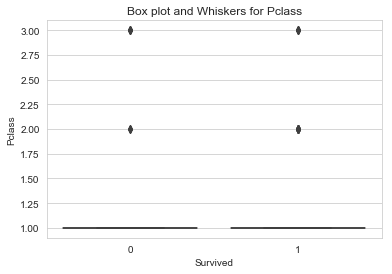

In [52]:
sns.boxplot(x='Survived',y='Pclass', data=titanic_data).set_title('Box plot and Whiskers for Pclass')
plt.show()

# 5.3.2. Violin plt for Pclass

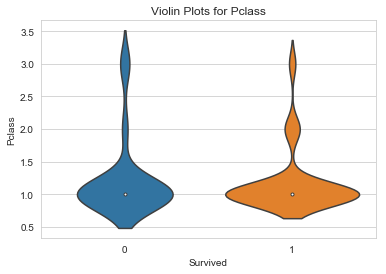

In [53]:
#Violin plot
sns.violinplot(x="Survived", y="Pclass", data=titanic_data, height=8).set_title("Violin Plots for Pclass")
plt.show()

## 6. correlation matrix 

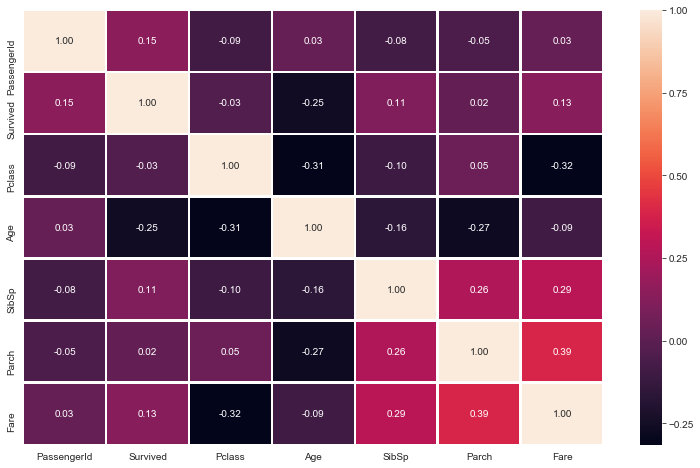

In [59]:
corr = titanic_data.corr()
row = xticklabels=titanic_data.corr().columns.values
col =  yticklabels=titanic_data.corr().columns.values

f,ax = plt.subplots(figsize=(13,8))
sns.heatmap(corr,annot = True, linewidths=1.5 , fmt = '.2f',ax=ax)
plt.show()

### Observaion :
 From the above Correlation matrix I observed that, Feature Survived and Fare are positively correlated.